In [1]:
import geopandas as gpd
import fiona
import os
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import configparser

In [4]:

# Read the configuration file
config = configparser.ConfigParser()
config_file = 'config.ini'
# check if file exists
if not os.path.isfile(config_file):
    # create a simple config file
    config['Paths'] = {'gdb_folder': '/path/to/your/gdb/folder'}
    with open(config_file, 'w') as configfile:
        config.write(configfile)
    print(f"Created configuration file '{config_file}'.")

config.read('config.ini')

gdb_folder = config['Paths']['gdb_folder']


In [5]:
# Define the folder containing the files
#gdb_folder = "/Users/annarubtsov/Desktop/DSSG/Michaels_Data/All_Layers"
# List all .gdb directories in the folder
gdb_files = [os.path.join(gdb_folder, f) for f in os.listdir(gdb_folder) if f.endswith('.gdb')]
print("GDB Files:", gdb_files)


GDB Files: []


In [3]:
# Choose a specific .gdb file (first one in this case)
gdb_file = gdb_files[3]  # Modify if you want to choose a different .gdb

# List the layers in the selected .gdb
layers = fiona.listlayers(gdb_file)
print("Layers in the selected GDB:", layers)

# Choose a specific layer within the .gdb
textures_layer = layers[0]  # Modify if you want to choose a different layer

# Load the specific layer
gdf = gpd.read_file(gdb_file, layer=textures_layer)

# choose column to categorize by 
# 'hearot' for Regishut (file 0)
# None for Binyanim (file 1)
# None for Helkot (file 2)
# 'סיווג_מרקמים_12042024' for Mirkamim (file 3)
categorize_col = 'סיווג_מרקמים_12042024'

Layers in the selected GDB: ['סיווג_מרקמים']


In [4]:
print(gdf.head())  # Shows the first 5 rows of the table


    סוג הערות                       קטגוריה         סיווג_מרקמים_12042024  \
0  None     4  בניה ישראלית של העת העכשווית  בניה מודרניסטית קבלנות פרטית   
1  None     4         מרחבי הפרויקט הישראלי               הפרויקט הישראלי   
2  None     4         מרחבי הפרויקט הישראלי               הפרויקט הישראלי   
3  None     4         מרחבי הפרויקט הישראלי               הפרויקט הישראלי   
4  None     4         מרחבי הפרויקט הישראלי               הפרויקט הישראלי   

  שכונה  Shape_Length     Shape_Area  \
0  None   3135.773391  426553.111578   
1  None   1722.702909  147558.587917   
2  None    867.289433   20467.159353   
3  None    582.858161   17635.895367   
4  None    905.787245   16306.314716   

                                            geometry  
0  MULTIPOLYGON (((3914503.352 3730672.601, 39144...  
1  MULTIPOLYGON (((3914939.607 3730959.3, 3914966...  
2  MULTIPOLYGON (((3915373.38 3731054.645, 391538...  
3  MULTIPOLYGON (((3915526.992 3730769.933, 39155...  
4  MULTIPOLYGON (((39

1) Simple layer plot (No Categorization)

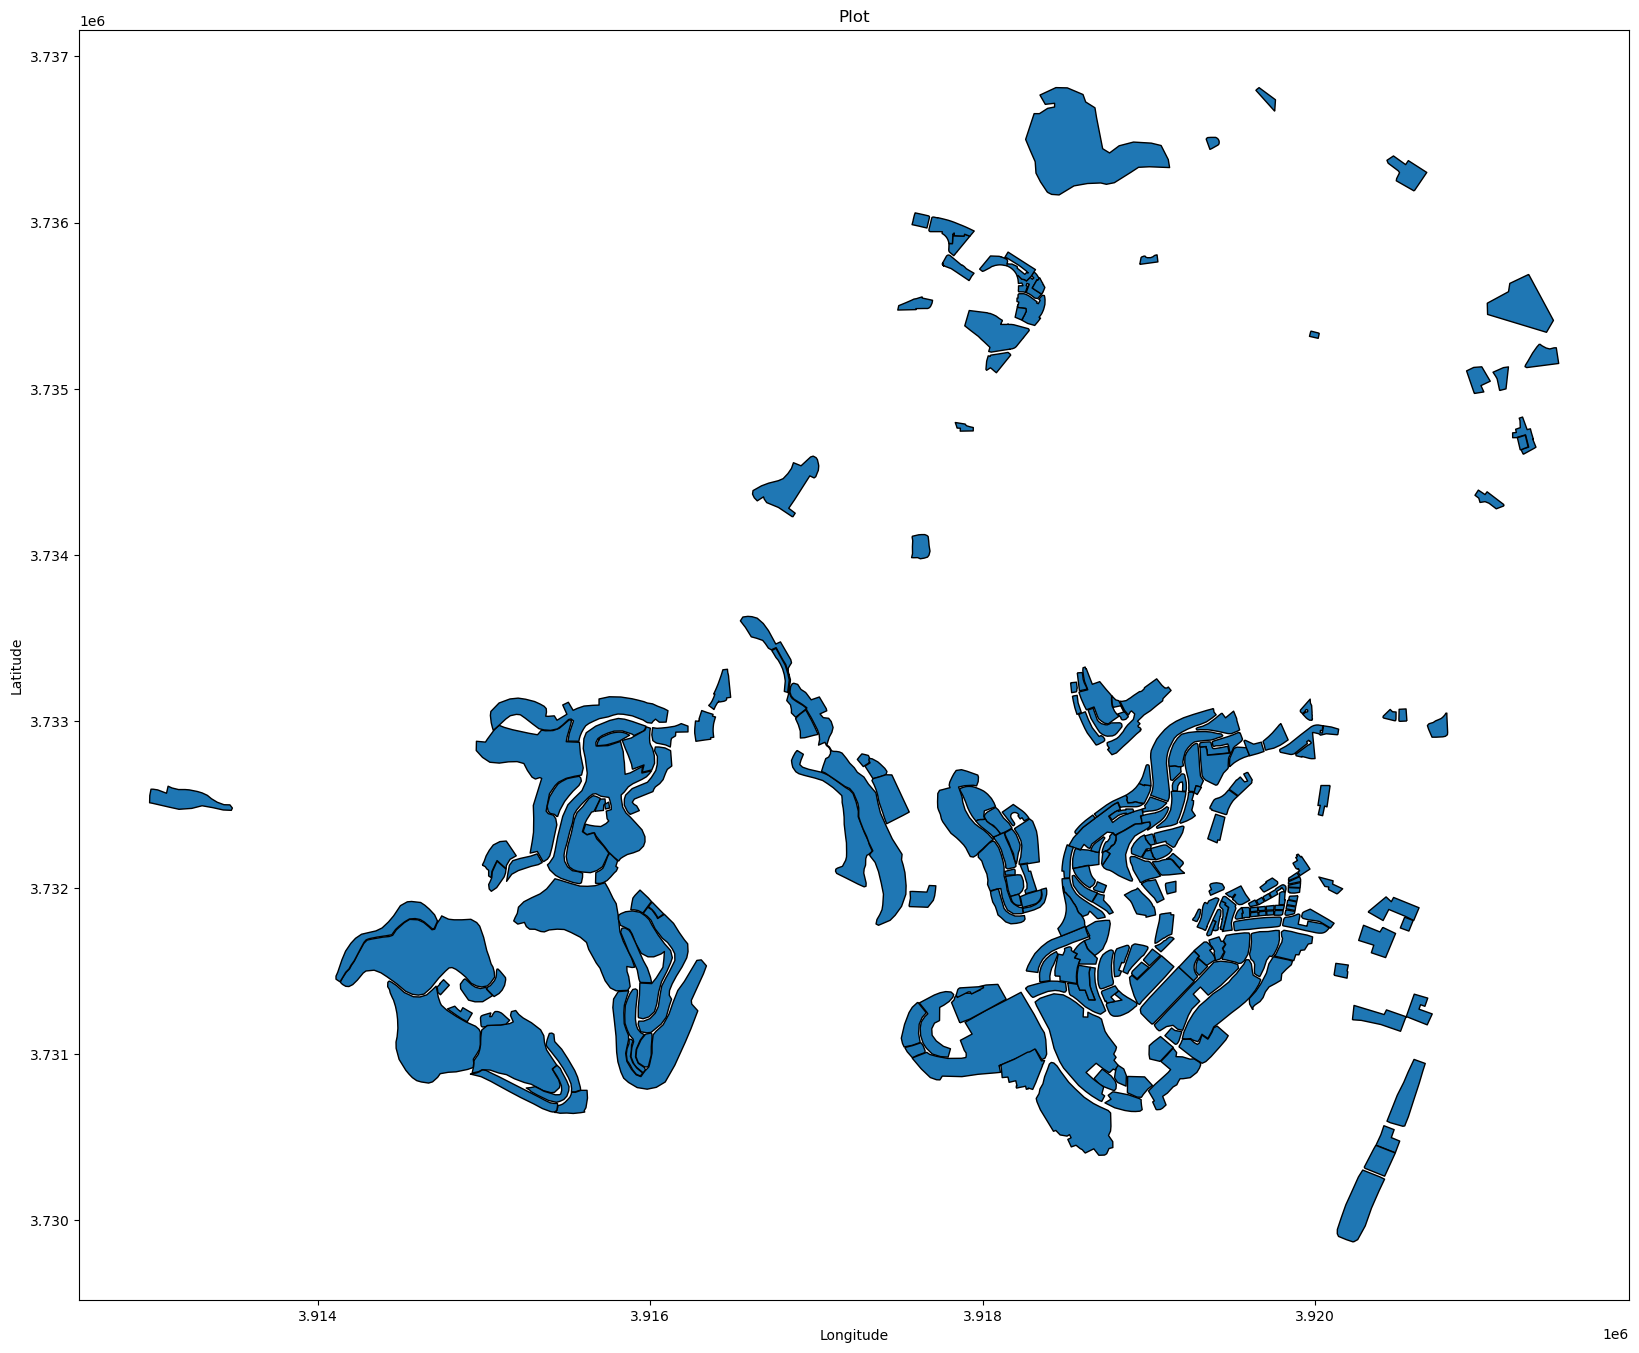

In [59]:
# Plot without categorization
fig, ax = plt.subplots(figsize=(20, 20))
gdf.plot(ax=ax, edgecolor='k') # No 'column' argument, so no categorization

# Add title and labels
plt.title('Plot')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show plot
plt.show()

2) Simple layer plot (With Categorization)

In [ ]:
# Plot with categorization
fig, ax = plt.subplots(figsize=(20, 20))
gdf.plot(column=categorize_col, ax=ax, legend=True,
         cmap='tab20',  # You can choose any colormap you like
         edgecolor='k')  # Optional: adds black borders around polygons

# Add title and labels
plt.title('Categorized Plot')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show plot
plt.show()

3) Layer plot with modified legend

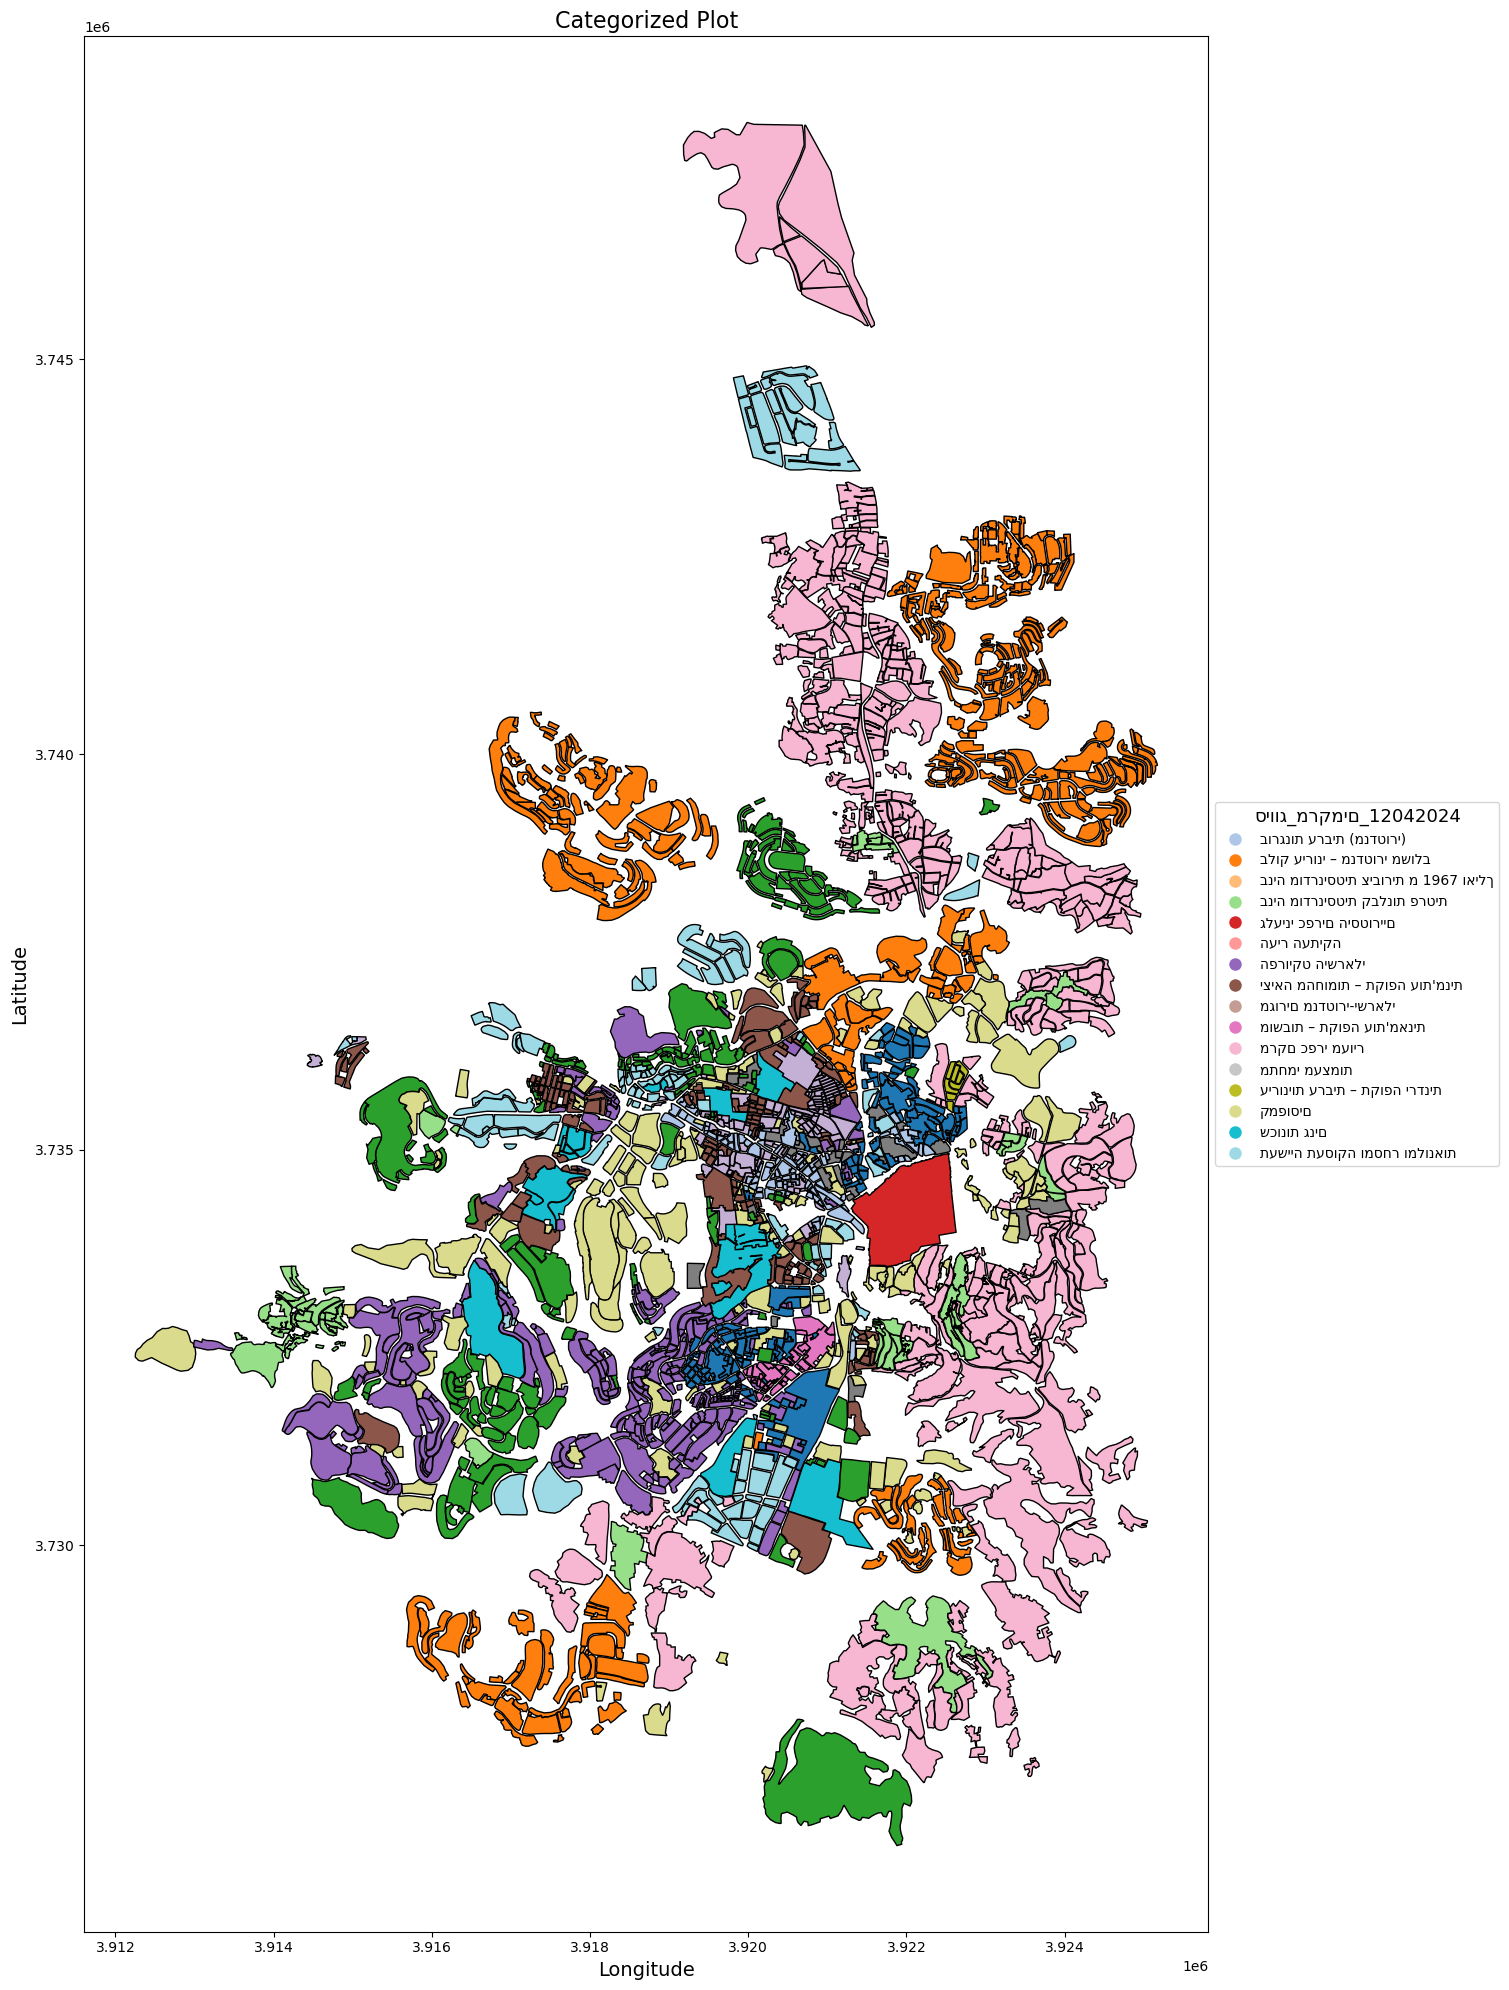

In [63]:
# Convert categories to numeric values
gdf['numeric_category'] = gdf['סיווג_מרקמים_12042024'].astype('category').cat.codes

# Plot with categorization
fig, ax = plt.subplots(figsize=(20, 20))
gdf.plot(column=categorize_col, ax=ax, legend=False,
         cmap='tab20',  # You can choose any colormap you like
         edgecolor='k')  # Optional: adds black borders around polygons

# Generate custom legend handles
categories = gdf['סיווג_מרקמים_12042024'].astype('category').cat.categories
cmap = plt.get_cmap('tab20')
norm = plt.Normalize(vmin=gdf['numeric_category'].min(), vmax=gdf['numeric_category'].max())

handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(norm(cat_code)), markersize=10, linestyle='') 
           for cat_code in range(len(categories))]
labels = [cat for cat in categories]

# Add custom legend
ax.legend(handles=handles, labels=labels, title='סיווג_מרקמים_12042024', title_fontsize='13', loc='center left', bbox_to_anchor=(1, 0.5), fontsize='10')

# Add title and labels
plt.title('Categorized Plot', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)

# Adjust layout to make space for the legend
plt.tight_layout()

# Show plot
plt.show()